In [1]:
#Include this at the top of your colab code
import os
if not os.path.exists('.mujoco_setup_complete'):
  # Get the prereqs
  !apt-get -qq update
  !apt-get -qq install -y libosmesa6-dev libgl1-mesa-glx libglfw3 libgl1-mesa-dev libglew-dev patchelf
  # Get Mujoco
  !mkdir ~/.mujoco
  !wget -q https://mujoco.org/download/mujoco210-linux-x86_64.tar.gz -O mujoco.tar.gz
  !tar -zxf mujoco.tar.gz -C "$HOME/.mujoco"
  !rm mujoco.tar.gz
  # Add it to the actively loaded path and the bashrc path (these only do so much)
  !echo 'export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:$HOME/.mujoco/mujoco210/bin' >> ~/.bashrc 
  !echo 'export LD_PRELOAD=$LD_PRELOAD:/usr/lib/x86_64-linux-gnu/libGLEW.so' >> ~/.bashrc 
  # THE ANNOYING ONE, FORCE IT INTO LDCONFIG SO WE ACTUALLY GET ACCESS TO IT THIS SESSION
  !echo "/root/.mujoco/mujoco210/bin" > /etc/ld.so.conf.d/mujoco_ld_lib_path.conf
  !ldconfig
  # Install Mujoco-py
  !pip3 install -U 'mujoco-py<2.2,>=2.1'
  # run once
  !touch .mujoco_setup_complete

try:
  if _mujoco_run_once:
    pass
except NameError:
  _mujoco_run_once = False
if not _mujoco_run_once:
  # Add it to the actively loaded path and the bashrc path (these only do so much)
  try:
    os.environ['LD_LIBRARY_PATH']=os.environ['LD_LIBRARY_PATH'] + ':/root/.mujoco/mujoco210/bin'
  except KeyError:
    os.environ['LD_LIBRARY_PATH']='/root/.mujoco/mujoco210/bin'
  try:
    os.environ['LD_PRELOAD']=os.environ['LD_PRELOAD'] + ':/usr/lib/x86_64-linux-gnu/libGLEW.so'
  except KeyError:
    os.environ['LD_PRELOAD']='/usr/lib/x86_64-linux-gnu/libGLEW.so'
  # presetup so we don't see output on first env initialization
  import mujoco_py
  _mujoco_run_once = True

Selecting previously unselected package libgl1-mesa-glx:amd64.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../0-libgl1-mesa-glx_20.0.8-0ubuntu1~18.04.1_amd64.deb ...
Unpacking libgl1-mesa-glx:amd64 (20.0.8-0ubuntu1~18.04.1) ...
Selecting previously unselected package libglew2.0:amd64.
Preparing to unpack .../1-libglew2.0_2.0.0-5_amd64.deb ...
Unpacking libglew2.0:amd64 (2.0.0-5) ...
Selecting previously unselected package libglew-dev:amd64.
Preparing to unpack .../2-libglew-dev_2.0.0-5_amd64.deb ...
Unpacking libglew-dev:amd64 (2.0.0-5) ...
Selecting previously unselected package libglfw3:amd64.
Preparing to unpack .../3-libglfw3_3.2.1-1_amd64.deb ...
Unpacking libglfw3:amd64 (3.2.1-1) ...
Selecting previously unselected package patchelf.
Preparing to unpack .../4-patchelf_0.9-1_amd64.deb ...
Unpacking patchelf (0.9-1) ...
Selecting previously unselected package libosmesa6:amd64.
Preparing to unpack .../5-libosmesa6_20.0.8-0ubuntu1~18.0

##Setup

You will need to make a copy of this notebook in your Google Drive before you can edit the homework files. You can do so with **File &rarr; Save a copy in Drive**.

In [2]:
#@title mount your Google Drive
#@markdown Your work will be stored in a folder called `cs285_f2021` by default to prevent Colab instance timeouts from deleting your edits.

import os
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#@title set up mount symlink

DRIVE_PATH = '/content/gdrive/My\ Drive/cs285_f2021'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
  %mkdir $DRIVE_PATH

## the space in `My Drive` causes some issues,
## make a symlink to avoid this
SYM_PATH = '/content/cs285_f2021'
if not os.path.exists(SYM_PATH):
  !ln -s $DRIVE_PATH $SYM_PATH

In [4]:
#@title apt install requirements

#@markdown Run each section with Shift+Enter

#@markdown Double-click on section headers to show code.

!apt update 
!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        xvfb \
        python-opengl \
        ffmpeg

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic

In [5]:
#@title download mujoco

MJC_PATH = '{}/.mujoco'.format(SYM_PATH)
%mkdir $MJC_PATH
%cd $MJC_PATH
!wget -q https://www.roboti.us/download/mujoco200_linux.zip
!unzip -q mujoco200_linux.zip
%mv mujoco200_linux mujoco200
%rm mujoco200_linux.zip

mkdir: cannot create directory ‘/content/cs285_f2021/.mujoco’: File exists
/content/gdrive/My Drive/cs285_f2021/.mujoco


In [6]:
#@title update mujoco paths

import os

os.environ['LD_LIBRARY_PATH'] += ':{}/mujoco200/bin'.format(MJC_PATH)
os.environ['MUJOCO_PY_MUJOCO_PATH'] = '{}/mujoco200'.format(MJC_PATH)
os.environ['MUJOCO_PY_MJKEY_PATH'] = '{}/mjkey.txt'.format(MJC_PATH)

## installation on colab does not find *.so files
## in LD_LIBRARY_PATH, copy over manually instead
!cp $MJC_PATH/mujoco200/bin/*.so /usr/lib/x86_64-linux-gnu/

Copy over `mjkey.txt` into `/content/cs285_f2021/mujoco` before this step

In [7]:
!pip install mujoco-py==2.0.2.2

     |████████████████████████████████| 771 kB 3.8 MB/s 
  ERROR: Failed building wheel for mujoco-py
  Running setup.py clean for mujoco-py
Failed to build mujoco-py
  Attempting uninstall: mujoco-py
    Found existing installation: mujoco-py 2.1.2.14
    Uninstalling mujoco-py-2.1.2.14:
      Successfully uninstalled mujoco-py-2.1.2.14
    Running setup.py install for mujoco-py ... error
  Rolling back uninstall of mujoco-py
  Moving to /usr/local/lib/python3.7/dist-packages/mujoco_py-2.1.2.14.dist-info/
   from /usr/local/lib/python3.7/dist-packages/~ujoco_py-2.1.2.14.dist-info
  Moving to /usr/local/lib/python3.7/dist-packages/mujoco_py/__init__.py
   from /tmp/pip-uninstall-mnm1yhpr/__init__.py
  Moving to /usr/local/lib/python3.7/dist-packages/mujoco_py/__pycache__/
   from /usr/local/lib/python3.7/dist-packages/mujoco_py/~_pycache__
  Moving to /usr/local/lib/python3.7/dist-packages/mujoco_py/builder.py
   from /tmp/pip-uninstall-mnm1yhpr/builder.py
  Moving to /usr/local/lib/py

In [8]:
#@title clone and install mujoco-py

%cd $MJC_PATH
!git clone https://github.com/openai/mujoco-py.git
%cd mujoco-py
%pip install -e .

!pip install free-mujoco-py

## cythonize at the first import
import mujoco_py

/content/gdrive/My Drive/cs285_f2021/.mujoco
fatal: destination path 'mujoco-py' already exists and is not an empty directory.
/content/gdrive/My Drive/cs285_f2021/.mujoco/mujoco-py
Obtaining file:///content/gdrive/My%20Drive/cs285_f2021/.mujoco/mujoco-py
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Attempting uninstall: mujoco-py
    Found existing installation: mujoco-py 2.1.2.14
    Uninstalling mujoco-py-2.1.2.14:
      Successfully uninstalled mujoco-py-2.1.2.14
  Running setup.py develop for mujoco-py
     |████████████████████████████████| 14.1 MB 3.8 MB/s 
  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Using cached imageio-2.14.1-py3-none-any.whl (3.3 MB)
     |████████████████████████████████| 203 kB 70.4 MB/s 
  Using cached Pillow-9.0.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.3 MB

In [ ]:
#@title clone homework repo

%cd $SYM_PATH
!git clone https://github.com/RyanBelkhir/VVV.git
%cd VVV/hw1
%pip install -r requirements_colab.txt
%pip install -e .
os.kill(os.getpid(), 9)

/content/gdrive/My Drive/cs285_f2021
fatal: destination path 'VVV' already exists and is not an empty directory.
/content/gdrive/My Drive/cs285_f2021/VVV/hw1
Obtaining file:///content/gdrive/My%20Drive/cs285_f2021/VVV/hw1
  Attempting uninstall: cs285
    Found existing installation: cs285 0.1.0
    Can't uninstall 'cs285'. No files were found to uninstall.
  Running setup.py develop for cs285


In [1]:
#@title set up virtual display

from pyvirtualdisplay import Display

display = Display(visible=0, size=(1400, 900))
display.start()

In [2]:
#@title test virtual display

#@markdown If you see a video of a four-legged ant fumbling about, setup is complete!

import gym
from cs285.infrastructure.colab_utils import (
    wrap_env,
    show_video
) 

env = wrap_env(gym.make("Ant-v2"))

observation = env.reset()
for i in range(100):
    env.render(mode='rgb_array')
    obs, rew, term, _ = env.step(env.action_space.sample() ) 
    if term:
      break;
            
env.close()
print('Loading video...')
show_video()

Compiling /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx because it changed.
[1/1] Cythonizing /usr/local/lib/python3.7/dist-packages/mujoco_py/cymj.pyx
running build_ext
building 'mujoco_py.cymj' extension
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuextensionbuilder/temp.linux-x86_64-3.7/usr/local/lib
creating /usr/local/lib/python3.7/dist-packages/mujoco_py/generated/_pyxbld_2.0.2.13_37_linuxcpuexten

## Editing Code

To edit code, click the folder icon on the left menu. Navigate to the corresponding file (`cs285_f2021/...`). Double click a file to open an editor. There is a timeout of about ~12 hours with Colab while it is active (and less if you close your browser window). We sync your edits to Google Drive so that you won't lose your work in the event of an instance timeout, but you will need to re-mount your Google Drive and re-install packages with every new instance.

# Run Behavior Cloning (Problem 1)

In [4]:
%cd /content/cs285_f2021/VVV/hw1

/content/gdrive/My Drive/cs285_f2021/VVV/hw1


In [ ]:
# When gpu kernel image error
#!pip install torch torchvision torchaudio

     |██████████████████████████████▎ | 834.1 MB 1.2 MB/s eta 0:00:42tcmalloc: large alloc 1147494400 bytes == 0x564150560000 @  0x7fadeec3f615 0x5641170274cc 0x56411710747a 0x56411702a2ed 0x56411711be1d 0x56411709de99 0x5641170989ee 0x56411702bbda 0x56411709dd00 0x5641170989ee 0x56411702bbda 0x56411709a737 0x56411711cc66 0x564117099daf 0x56411711cc66 0x564117099daf 0x56411711cc66 0x564117099daf 0x56411702c039 0x56411706f409 0x56411702ac52 0x56411709dc25 0x5641170989ee 0x56411702bbda 0x56411709a737 0x5641170989ee 0x56411702bbda 0x564117099915 0x56411702bafa 0x564117099c0d 0x5641170989ee
     |████████████████████████████████| 881.9 MB 19 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.6.0
    Uninstalling torch-1.6.0:
      Successfully uninstalled torch-1.6.0


In [20]:
#@title imports

import os
import time
import numpy as np

from cs285.infrastructure.rl_trainer import RL_Trainer
from cs285.agents.bc_agent import BCAgent
from cs285.policies.loaded_gaussian_policy import LoadedGaussianPolicy

import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
class Args:

  def __getitem__(self, key):
    return getattr(self, key)

  def __setitem__(self, key, val):
    setattr(self, key, val)

  #@markdown expert data
  expert_policy_file = 'cs285/policies/experts/Ant.pkl' #@param
  expert_data = 'cs285/expert_data/expert_data_Ant-v2.pkl' #@param
  env_name = 'Ant-v2' #@param ['Ant-v2', 'Humanoid-v2', 'Walker2d-v2', 'HalfCheetah-v2', 'Hopper-v2']
  exp_name = 'bc_ant' #@param
  do_dagger = False #@param {type: "boolean"}

  ep_len = 1000 #@param {type: "integer"}
  save_params = False #@param {type: "boolean"}

  num_agent_train_steps_per_iter = 1000 #@param {type: "integer"})
  n_iter = 1 #@param {type: "integer"})

  #@markdown batches & buffers
  batch_size = 1000 #@param {type: "integer"})
  eval_batch_size = 5000 #@param {type: "integer"}
  train_batch_size = 5000 #@param {type: "integer"}
  max_replay_buffer_size = 1000000 #@param {type: "integer"}

  #@markdown network
  n_layers = 2 #@param {type: "integer"}
  size = 64 #@param {type: "integer"}
  learning_rate = 5e-3 #@param {type: "number"}

  #@markdown logging
  video_log_freq = 5 #@param {type: "integer"}
  scalar_log_freq = 1 #@param {type: "integer"}

  #@markdown gpu & run-time settings
  no_gpu = False #@param {type: "boolean"}
  which_gpu = 0 #@param {type: "integer"}
  seed = 1 #@param {type: "integer"}

args = Args()


In [23]:
#@title define `BC_Trainer`
class BC_Trainer(object):

    def __init__(self, params):
        #######################
        ## AGENT PARAMS
        #######################

        agent_params = {
            'n_layers': params['n_layers'],
            'size': params['size'],
            'learning_rate': params['learning_rate'],
            'max_replay_buffer_size': params['max_replay_buffer_size'],
            }

        self.params = params
        self.params['agent_class'] = BCAgent ## TODO: look in here and implement this
        self.params['agent_params'] = agent_params

        ################
        ## RL TRAINER
        ################

        self.rl_trainer = RL_Trainer(self.params) ## TODO: look in here and implement this

        #######################
        ## LOAD EXPERT POLICY
        #######################

        print('Loading expert policy from...', self.params['expert_policy_file'])
        self.loaded_expert_policy = LoadedGaussianPolicy(self.params['expert_policy_file'])
        print('Done restoring expert policy...')

    def run_training_loop(self):

        avg_mean, std = self.rl_trainer.run_training_loop(
            n_iter=self.params['n_iter'],
            initial_expertdata=self.params['expert_data'],
            collect_policy=self.rl_trainer.agent.actor,
            eval_policy=self.rl_trainer.agent.actor,
            relabel_with_expert=self.params['do_dagger'],
            expert_policy=self.loaded_expert_policy,
        )
        return avg_mean, std


In [24]:
#@title create directory for logging

if args.do_dagger:
    logdir_prefix = 'q2_'  # The autograder uses the prefix `q2_`
    assert args.n_iter>1, ('DAgger needs more than 1 iteration (n_iter>1) of training, to iteratively query the expert and train (after 1st warmstarting from behavior cloning).')
else:
    logdir_prefix = 'q1_'  # The autograder uses the prefix `q1_`
    assert args.n_iter==1, ('Vanilla behavior cloning collects expert data just once (n_iter=1)')

data_path ='/content/cs285_f2021/VVV/hw1/data'
if not (os.path.exists(data_path)):
    os.makedirs(data_path)
logdir = logdir_prefix + args.exp_name + '_' + args.env_name + \
         '_' + time.strftime("%d-%m-%Y_%H-%M-%S")
logdir = os.path.join(data_path, logdir)
args['logdir'] = logdir
if not(os.path.exists(logdir)):
    os.makedirs(logdir)

In [14]:
## run training
print(args.logdir)
trainer = BC_Trainer(args)
avg_mean, std = trainer.run_training_loop()

/content/cs285_f2021/VVV/hw1/data/q1_bc_humanoid_Humanoid-v2_26-01-2022_11-47-08
########################
logging outputs to  /content/cs285_f2021/VVV/hw1/data/q1_bc_humanoid_Humanoid-v2_26-01-2022_11-47-08
########################
Using GPU id 0
Loading expert policy from... cs285/policies/experts/Humanoid.pkl
obs (1, 376) (1, 376)
Done restoring expert policy...


********** Iteration 0 ************

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 310.3992919921875
Eval_StdReturn : 66.47850799560547
Eval_MaxReturn : 606.4967651367188
Eval_MinReturn : 189.89810180664062
Eval_AverageEpLen : 56.50561797752809
Train_AverageReturn : 10344.517578125
Train_StdReturn : 20.9814453125
Train_MaxReturn : 10365.4990234375
Train_MinReturn : 10323.5361328125
Train_AverageEpLen : 1000.0
Train_EnvstepsSoFar : 0
TimeSinceStart : 10.016576766967773
Training Loss : 0.098368339240551
Initial_DataCollection_AverageReturn : 10344.517578125
Done 

## Question 1 : Ant environment 

In [15]:
!python cs285/scripts/run_hw1.py --expert_policy_file  cs285/policies/experts/Ant.pkl --env_name  Ant-v2  --exp_name  bc_ant  --n_iter  1 --eval_batch_size 5000 --train_batch_size 5000 --expert_data cs285/expert_data/expert_data_Ant-v2.pkl --video_log_freq  -1 

########################
logging outputs to  /content/gdrive/My Drive/cs285_f2021/VVV/hw1/cs285/scripts/../../data/q1_bc_ant_Ant-v2_26-01-2022_11-47-52
########################
Using GPU id 0
Loading expert policy from... cs285/policies/experts/Ant.pkl
obs (1, 111) (1, 111)
Done restoring expert policy...


********** Iteration 0 ************

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 3301.712890625
Eval_StdReturn : 409.875732421875
Eval_MaxReturn : 3720.39990234375
Eval_MinReturn : 2448.33544921875
Eval_AverageEpLen : 960.5
Train_AverageReturn : 4713.6533203125
Train_StdReturn : 12.196533203125
Train_MaxReturn : 4725.849609375
Train_MinReturn : 4701.45654296875
Train_AverageEpLen : 1000.0
Train_EnvstepsSoFar : 0
TimeSinceStart : 7.540084362030029
Training Loss : 0.03306889161467552
Initial_DataCollection_AverageReturn : 4713.6533203125
Done logging...




## Question 1 : Humanoid Environment

In [16]:
!python cs285/scripts/run_hw1.py --expert_policy_file  cs285/policies/experts/Humanoid.pkl --env_name  Humanoid-v2  --exp_name  bc_humanoid  --n_iter  1 --eval_batch_size 5000 --train_batch_size 5000 --expert_data cs285/expert_data/expert_data_Humanoid-v2.pkl --video_log_freq  -1 

########################
logging outputs to  /content/gdrive/My Drive/cs285_f2021/VVV/hw1/cs285/scripts/../../data/q1_bc_humanoid_Humanoid-v2_26-01-2022_11-48-17
########################
Using GPU id 0
Loading expert policy from... cs285/policies/experts/Humanoid.pkl
obs (1, 376) (1, 376)
Done restoring expert policy...


********** Iteration 0 ************

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 310.3992919921875
Eval_StdReturn : 66.47850799560547
Eval_MaxReturn : 606.4967651367188
Eval_MinReturn : 189.89810180664062
Eval_AverageEpLen : 56.50561797752809
Train_AverageReturn : 10344.517578125
Train_StdReturn : 20.9814453125
Train_MaxReturn : 10365.4990234375
Train_MinReturn : 10323.5361328125
Train_AverageEpLen : 1000.0
Train_EnvstepsSoFar : 0
TimeSinceStart : 9.435055255889893
Training Loss : 0.098368339240551
Initial_DataCollection_AverageReturn : 10344.517578125
Done logging...




## Impact of the train steps on performances

In [25]:
# Plot 1.3
## run training
train_steps = list(range(250, 5000, 250))
avg_mean_list = []
std_list = []
for step in train_steps:
    print("Step :", step)
    args.num_agent_train_steps_per_iter = step
    print(args.logdir)
    trainer = BC_Trainer(args)
    avg_mean, std = trainer.run_training_loop()
    avg_mean_list.append(avg_mean)
    std_list.append(std)


Step : 250
/content/cs285_f2021/VVV/hw1/data/q1_bc_ant_Ant-v2_26-01-2022_11-55-45
########################
logging outputs to  /content/cs285_f2021/VVV/hw1/data/q1_bc_ant_Ant-v2_26-01-2022_11-55-45
########################
Using GPU id 0
Loading expert policy from... cs285/policies/experts/Ant.pkl
obs (1, 111) (1, 111)
Done restoring expert policy...


********** Iteration 0 ************

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : -186.52685546875
Eval_StdReturn : 420.5122985839844
Eval_MaxReturn : 230.60134887695312
Eval_MinReturn : -859.0860595703125
Eval_AverageEpLen : 723.1428571428571
Train_AverageReturn : 4713.6533203125
Train_StdReturn : 12.196533203125
Train_MaxReturn : 4725.849609375
Train_MinReturn : 4701.45654296875
Train_AverageEpLen : 1000.0
Train_EnvstepsSoFar : 0
TimeSinceStart : 5.350067138671875
Training Loss : 0.19571304321289062
Initial_DataCollection_AverageReturn : 4713.6533203125
Done logging...




In [28]:
print(std_list)

[420.5123, 567.25366, 1043.7561, 409.87573, 144.1006, 115.8258, 1115.4514, 141.46747, 112.78482, 77.095566, 58.151585, 64.29558, 842.4691, 89.055534, 67.08086, 123.66148, 135.84744, 112.04937, 144.29451]


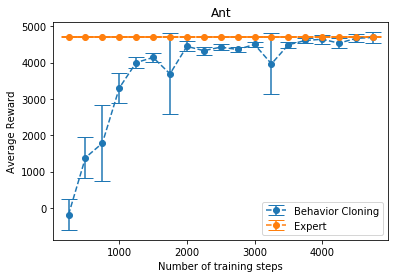

In [30]:
# Plot impact of training step on the Ant Environment (need to run the previous cells with Ant BC)
envname = 'Ant'
mean = avg_mean_list # [-186.52686, 1383.6658, 1781.5647, 3301.713, 4002.229, 4143.2783, 3691.679, 4449.345, 4330.0825, 4426.361, 4363.559, 4501.096, 3967.2478, 4492.095, 4610.253, 4645.1836, 4535.944, 4670.231, 4693.086]
std = std_list # [420.5123, 567.25366, 1043.7561, 409.87573, 144.1006, 115.8258, 1115.4514, 141.46747, 112.78482, 77.095566, 58.151585, 64.29558, 842.4691, 89.055534, 67.08086, 123.66148, 135.84744, 112.04937, 144.29451]

expert_mean = [4713.65] * len(train_steps)
expert_std = [12.20] * len(train_steps)

# plt.figure(figsize=(1920 / 72, 1080 / 72))
plt.figure()
plt.errorbar(train_steps, mean, std, marker='o', capsize=8, linestyle='--', label='Behavior Cloning')
plt.errorbar(train_steps, expert_mean, expert_std, marker='o', capsize=8, linestyle='--', label='Expert')
plt.xlabel('Number of training steps')
plt.ylabel('Average Reward')
plt.title(envname)
plt.legend()

# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)


plt.show()


In [ ]:
#@markdown You can visualize your runs with tensorboard from within the notebook

%load_ext tensorboard
%tensorboard --logdir /content/cs285_f2021/VVV/hw1/data

# Running DAgger (Problem 2)
Modify the settings above:
1. check the `do_dagger` box
2. set `n_iters` to `10`
and then rerun the code.

In [32]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from tensorflow.python.summary.summary_iterator import summary_iterator
sns.set_theme()

## Reward of the BC ant according to the number of iterations

In [33]:
def get_section_results(file):
    steps = []
    eval_returns = []
    eval_stdRets = []
    for e in summary_iterator(file):
        for v in e.summary.value:
            if v.tag == 'Eval_AverageReturn':
                steps.append(e.step)
                eval_returns.append(v.simple_value)
            if v.tag == 'Eval_StdReturn':
                eval_stdRets.append(v.simple_value)
    data_np = np.vstack([steps, eval_returns, eval_stdRets]).T
    data_df = pd.DataFrame(data_np, columns=['step', 'Eval_AverageReturn', 'Eval_StdReturn'])
    return data_df

In [34]:
!python cs285/scripts/run_hw1.py --expert_policy_file cs285/policies/experts/Ant.pkl  --env_name  Ant-v2  --exp_name  dagger_ant  --n_iter  10 --do_dagger --eval_batch_size 5000 --train_batch_size 5000  --expert_data  cs285/expert_data/expert_data_Ant-v2.pkl --video_log_freq  -1 

########################
logging outputs to  /content/gdrive/My Drive/cs285_f2021/VVV/hw1/cs285/scripts/../../data/q2_dagger_ant_Ant-v2_26-01-2022_12-01-24
########################
Using GPU id 0
Loading expert policy from... cs285/policies/experts/Ant.pkl
obs (1, 111) (1, 111)
Done restoring expert policy...


********** Iteration 0 ************

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 3301.712890625
Eval_StdReturn : 409.875732421875
Eval_MaxReturn : 3720.39990234375
Eval_MinReturn : 2448.33544921875
Eval_AverageEpLen : 960.5
Train_AverageReturn : 4713.6533203125
Train_StdReturn : 12.196533203125
Train_MaxReturn : 4725.849609375
Train_MinReturn : 4701.45654296875
Train_AverageEpLen : 1000.0
Train_EnvstepsSoFar : 0
TimeSinceStart : 7.831207513809204
Training Loss : 0.03306889161467552
Initial_DataCollection_AverageReturn : 4713.6533203125
Done logging...




********** Iteration 1 ************


Relabelling collected

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


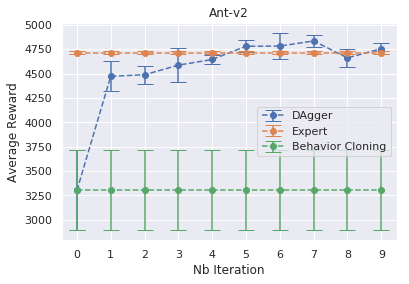

In [35]:
envname = "Ant-v2"
num_iter = list(range(0, 10))
dagger_file = '/content/cs285_f2021/VVV/hw1/data/q2_dagger_ant_Ant-v2_25-01-2022_18-05-37/events.out.tfevents.1643133937.459522583bed'
df = get_section_results(dagger_file)
mean = df["Eval_AverageReturn"]
std = df["Eval_StdReturn"]
expert_mean = [4713.65] * len(num_iter)
expert_std = [12.20] * len(num_iter)

imitation_mean = [3301.71] * len(num_iter)
imitation_std = [409.87] * len(num_iter)

ax = plt.figure().gca()
plt.errorbar(num_iter, mean, std, marker='o', capsize=8, linestyle='--', label='DAgger')
plt.errorbar(num_iter, expert_mean, expert_std, marker='o', capsize=8, linestyle='--', label='Expert')
plt.errorbar(num_iter, imitation_mean, imitation_std, marker='o', capsize=8, linestyle='--', label='Behavior Cloning')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Nb Iteration')
plt.ylabel('Average Reward')
plt.title(envname)
plt.legend()

plt.show()

## Reward of the BC humanoid according to the number of iterations

In [36]:
!python cs285/scripts/run_hw1.py --expert_policy_file  cs285/policies/experts/Humanoid.pkl --env_name  Humanoid-v2  --exp_name  dagger_humanoid  --n_iter  10 --do_dagger --eval_batch_size 5000 --train_batch_size 5000 --seed  1  --expert_data cs285/expert_data/expert_data_Humanoid-v2.pkl --video_log_freq -1 

########################
logging outputs to  /content/gdrive/My Drive/cs285_f2021/VVV/hw1/cs285/scripts/../../data/q2_dagger_humanoid_Humanoid-v2_26-01-2022_12-03-33
########################
Using GPU id 0
Loading expert policy from... cs285/policies/experts/Humanoid.pkl
obs (1, 376) (1, 376)
Done restoring expert policy...


********** Iteration 0 ************

Training agent using sampled data from replay buffer...

Beginning logging procedure...

Eval_AverageReturn : 310.3992919921875
Eval_StdReturn : 66.47850799560547
Eval_MaxReturn : 606.4967651367188
Eval_MinReturn : 189.89810180664062
Eval_AverageEpLen : 56.50561797752809
Train_AverageReturn : 10344.517578125
Train_StdReturn : 20.9814453125
Train_MaxReturn : 10365.4990234375
Train_MinReturn : 10323.5361328125
Train_AverageEpLen : 1000.0
Train_EnvstepsSoFar : 0
TimeSinceStart : 9.562335729598999
Training Loss : 0.098368339240551
Initial_DataCollection_AverageReturn : 10344.517578125
Done logging...




********** Iteration 1 ****

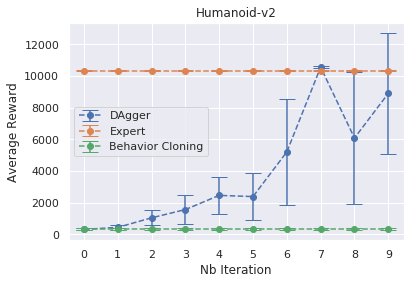

In [38]:
envname = "Humanoid-v2"
num_iter = list(range(0, 10))
dagger_file = '/content/cs285_f2021/VVV/hw1/data/q2_dagger_humanoid_Humanoid-v2_25-01-2022_18-24-54/events.out.tfevents.1643135094.459522583bed'
df = get_section_results(dagger_file)
mean = df["Eval_AverageReturn"]
std = df["Eval_StdReturn"]
expert_mean = [10344.52] * len(num_iter)
expert_std = [20.98] * len(num_iter)

imitation_mean = [310.4] * len(num_iter)
imitation_std = [66.47] * len(num_iter)

ax = plt.figure().gca()
plt.errorbar(num_iter, mean, std, marker='o', capsize=8, linestyle='--', label='DAgger')
plt.errorbar(num_iter, expert_mean, expert_std, marker='o', capsize=8, linestyle='--', label='Expert')
plt.errorbar(num_iter, imitation_mean, imitation_std, marker='o', capsize=8, linestyle='--', label='Behavior Cloning')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel('Nb Iteration')
plt.ylabel('Average Reward')
plt.title(envname)
plt.legend()

plt.show()